In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('../data/heart_disease_cleaned.csv')
X = df.drop('target', axis=1)
y = df['target']

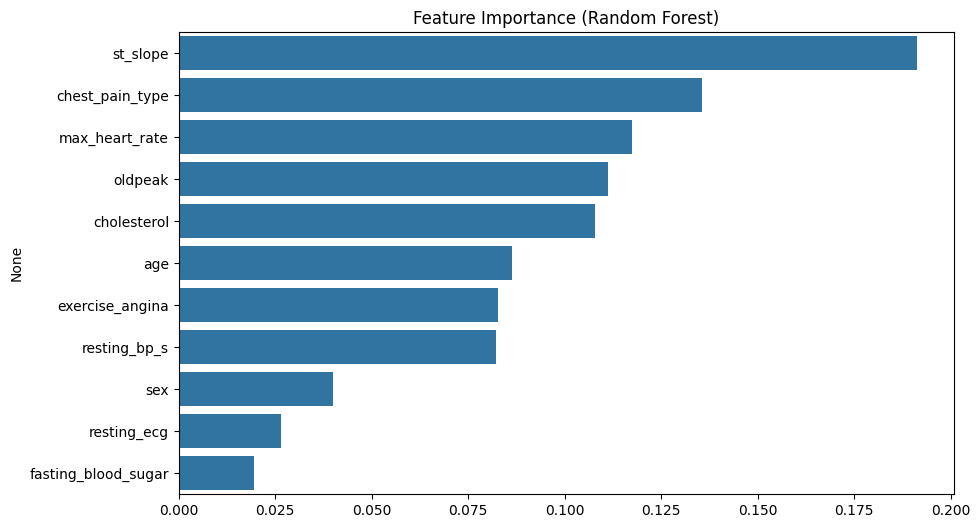

In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importance (Random Forest)')
plt.show()

In [6]:
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X, y)
selected_rfe = X.columns[rfe.support_]
print("RFE Selected Features:", selected_rfe.tolist())

RFE Selected Features: ['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'st_slope']


In [7]:

X_minmax = MinMaxScaler().fit_transform(X)
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_minmax, y)
selected_chi2 = X.columns[chi2_selector.get_support()]
print("Chi2 Selected Features:", selected_chi2.tolist())

Chi2 Selected Features: ['age', 'sex', 'chest_pain_type', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'st_slope']


In [8]:

selected_features = list(set(selected_rfe) | set(selected_chi2))
print("Final Selected Features:", selected_features)

X_selected = X[selected_features]
df_selected = pd.concat([X_selected, y], axis=1)
df_selected.to_csv('../data/heart_disease_selected.csv', index=False)

Final Selected Features: ['fasting_blood_sugar', 'sex', 'cholesterol', 'exercise_angina', 'chest_pain_type', 'oldpeak', 'st_slope', 'age', 'max_heart_rate', 'resting_ecg', 'resting_bp_s']
